use historical weather Data from https://open-meteo.com/en/docs/historical-weather-api

In [7]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry
import datetime
import seaborn as sns


### 1. Daily Data

In [8]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 31.2222,
	"longitude": 121.4581,
	"start_date": "2017-05-01",
	"end_date": "2017-08-31",
	"daily": ["temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "apparent_temperature_max", "apparent_temperature_min", "apparent_temperature_mean", "precipitation_sum", "rain_sum", "wind_speed_10m_max"],
	"timezone": "Asia/Singapore"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(1).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(2).ValuesAsNumpy()
daily_apparent_temperature_max = daily.Variables(3).ValuesAsNumpy()
daily_apparent_temperature_min = daily.Variables(4).ValuesAsNumpy()
daily_apparent_temperature_mean = daily.Variables(5).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(6).ValuesAsNumpy()
daily_rain_sum = daily.Variables(7).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(8).ValuesAsNumpy()

# daily_data = {"date": pd.date_range(
# 	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
# 	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),

# 	freq = pd.Timedelta(seconds = daily.Interval()),
# 	inclusive = "left"
# )}

daily_data = {"date": [int(datetime.datetime.strftime(mydate,'%Y%m%d')) for mydate in pd.date_range(start = "2017-05-01",end = "2017-08-31")]}


daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["apparent_temperature_max"] = daily_apparent_temperature_max
daily_data["apparent_temperature_min"] = daily_apparent_temperature_min
daily_data["apparent_temperature_mean"] = daily_apparent_temperature_mean
daily_data["precipitation_sum"] = daily_precipitation_sum
daily_data["rain_sum"] = daily_rain_sum
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max

daily_dataframe = pd.DataFrame(data = daily_data)
daily_dataframe

Coordinates 31.247802734375°N 121.5°E
Elevation 7.0 m asl
Timezone b'Asia/Singapore' b'GMT+8'
Timezone difference to GMT+0 28800 s


,date,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,rain_sum,wind_speed_10m_max
0,20170501,27.143499,15.743500,20.795582,28.280354,15.241692,20.957291,0.5,0.5,18.118410
1,20170502,20.343500,16.743500,17.855999,19.129244,14.431997,16.919538,11.1,11.1,25.630886
2,20170503,20.993500,16.443501,18.324747,19.401737,15.271343,17.320448,0.0,0.0,24.766848
3,20170504,22.493500,17.243500,19.799749,23.841429,16.771841,20.155109,6.6,6.6,25.924999
4,20170505,22.193501,16.743500,19.462248,21.893026,17.908184,19.874636,0.7,0.7,21.313093
...,...,...,...,...,...,...,...,...,...,...
118,20170827,31.543499,25.243500,28.101831,36.523693,28.807003,32.722103,0.5,0.5,13.246826
119,20170828,34.193501,26.143499,29.849752,41.297127,31.244705,35.829201,0.3,0.3,14.345898
120,20170829,28.743500,24.893499,26.860167,33.907063,26.582499,30.542704,3.2,3.2,25.460934
121,20170830,26.593500,23.443501,25.035166,27.381721,25.352037,26.586243,0.0,0.0,20.421871


In [9]:
daily_dataframe.to_csv('../../MetaData/shanghai_weatherDaily.csv', index=None)

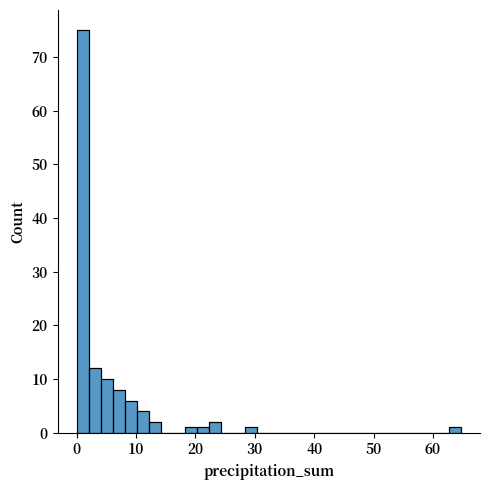

In [10]:
sns.displot(daily_dataframe["precipitation_sum"])

6 月 10日清晨，上海遭遇入汛后首场暴雨。上海中心气象台先后发布雷电黄色预警信号及暴雨黄色预警信号，上海部分区县因短时强降水现“看海”“成河”情景。

　　上海入汛后首场暴雨来势汹汹。上海市气象局表示，受低涡切变线影响，9日夜间至10日长江中下游地区将出现一次暴雨到大暴雨过程，上海亦“榜上有名”。10日一早，倾盆大雨突袭沪上，上海各区县过程累积雨量普遍可达40至60毫米，北部地区24小时过程雨量可高达70至100毫米。

### 2. Hourly Data

In [11]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 31.2222,
	"longitude": 121.4581,
	"start_date": "2017-05-01",
	"end_date": "2017-08-31",
	"hourly": ["temperature_2m", "apparent_temperature", "rain", "wind_speed_10m"],
	"timezone": "Asia/Singapore"
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(1).ValuesAsNumpy()
hourly_rain = hourly.Variables(2).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(3).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = "2017-05-01",
	end = "2017-09-01",
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}

hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["rain"] = hourly_rain
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m

hourly_dataframe = pd.DataFrame(data = hourly_data)
hourly_dataframe

Coordinates 31.247802734375°N 121.5°E
Elevation 7.0 m asl
Timezone b'Asia/Singapore' b'GMT+8'
Timezone difference to GMT+0 28800 s


,date,temperature_2m,apparent_temperature,rain,wind_speed_10m
0,2017-05-01 00:00:00,16.793499,15.912954,0.0,12.313893
1,2017-05-01 01:00:00,16.493500,15.711000,0.0,11.874544
2,2017-05-01 02:00:00,16.243500,15.501007,0.0,12.069400
3,2017-05-01 03:00:00,15.893499,15.241692,0.0,12.522619
4,2017-05-01 04:00:00,15.743500,15.351650,0.0,11.966953
...,...,...,...,...,...
2947,2017-08-31 19:00:00,23.793499,26.130484,0.0,9.585739
2948,2017-08-31 20:00:00,22.993500,26.382540,0.0,5.154416
2949,2017-08-31 21:00:00,23.193501,26.288685,0.0,6.638072
2950,2017-08-31 22:00:00,23.243500,25.867935,0.0,8.473393


In [12]:
hourly_dataframe.to_csv('../../MetaData/shanghai_weatherHourly.csv', index=None)